In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2, f_regression, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

import matplotlib.pyplot as plt
path = 'C:\\Users\\Othamne\\OneDrive - University of Ottawa\\Winter 2023\\CSI 4142\\Github\\Fundamentals-of-Data-Science\\Physical-Design-Deliverable-2\\assets\\'


In [2]:
ft = pd.read_csv(path+'Sales_table.csv', index_col = 0)
g = pd.read_csv(path + 'game\\game_dimension.csv', index_col = 0)

In [3]:
ft.Platform = ft.Platform.astype('category')
ft.Genre = ft.Genre.astype('category')
ft.Publisher = ft.Publisher.astype('category')

In [4]:
merge = ft.merge(g, left_on='Name', right_on = 'Name')

## Data Summarization/Exploration:

The objective of this section is to get a feel of the data by exploring some Attribute propertires. We first do a drill down on the fact table to get more information. The features of interest in our analysis are the Global Sales and the Review scores. We would lie to explore those attributes, their distribution, their relation with one another.

In order to see the transformations applied on our dataset see [here](https://github.com/maanuw/Fundamentals-of-Data-Science/tree/main/Physical-Design-Deliverable-2)

In [5]:
merge = merge[['Year', 'Global_Sales', 'Platform', 'Publisher', 'Review_score', 'SinglePlayer_All_PlayStyles_Polled']]
merge.Platform = merge.Platform.astype('category')
merge.Publisher = merge.Publisher.astype('category')

In [6]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2380 entries, 0 to 2379
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Year                                2380 non-null   int64   
 1   Global_Sales                        2380 non-null   float64 
 2   Platform                            2380 non-null   category
 3   Publisher                           2380 non-null   category
 4   Review_score                        2380 non-null   int64   
 5   SinglePlayer_All_PlayStyles_Polled  2380 non-null   float64 
dtypes: category(2), float64(2), int64(2)
memory usage: 99.0 KB


We start by generating the scatter plot matrix of our features. 

array([[<Axes: xlabel='Year', ylabel='Year'>,
        <Axes: xlabel='Global_Sales', ylabel='Year'>,
        <Axes: xlabel='Review_score', ylabel='Year'>,
        <Axes: xlabel='SinglePlayer_All_PlayStyles_Polled', ylabel='Year'>],
       [<Axes: xlabel='Year', ylabel='Global_Sales'>,
        <Axes: xlabel='Global_Sales', ylabel='Global_Sales'>,
        <Axes: xlabel='Review_score', ylabel='Global_Sales'>,
        <Axes: xlabel='SinglePlayer_All_PlayStyles_Polled', ylabel='Global_Sales'>],
       [<Axes: xlabel='Year', ylabel='Review_score'>,
        <Axes: xlabel='Global_Sales', ylabel='Review_score'>,
        <Axes: xlabel='Review_score', ylabel='Review_score'>,
        <Axes: xlabel='SinglePlayer_All_PlayStyles_Polled', ylabel='Review_score'>],
       [<Axes: xlabel='Year', ylabel='SinglePlayer_All_PlayStyles_Polled'>,
        <Axes: xlabel='Global_Sales', ylabel='SinglePlayer_All_PlayStyles_Polled'>,
        <Axes: xlabel='Review_score', ylabel='SinglePlayer_All_PlayStyles_Polled'>,

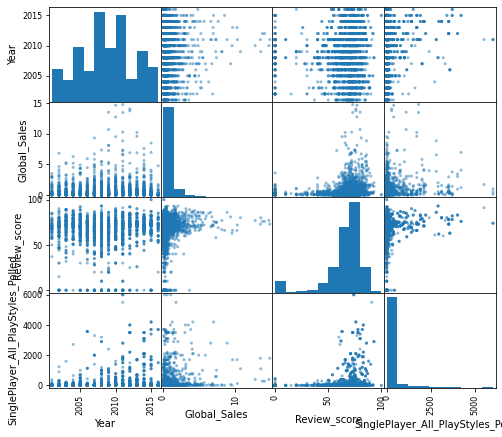

In [7]:
pd.plotting.scatter_matrix(merge, figsize=(8,7))

Information we can extract from the scatter plot:
- **observation 1:** The global sales have a noticable increase arround the year 2010

Assuming the Review Score of a game is an indicator of the game quality
- **observation 2:** We notice that there no substantial change in terms of Game quality throughout the years.
- **observation 3:** The higher the game quality, the more sales it will generate
- **observation 4:** Games with longer playtime are generally of better quality, but it doesn't mean that it will generate more revenue

C:\Users\Othamne\AppData\Local\Temp/ipykernel_14496/1223738083.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x = ft.groupby(['Platform']).sum()


([<matplotlib.patches.Wedge at 0x147ac7719d0>,
 [Text(3.298927079477986, 0.08414347441629935, '3DS'),
  Text(3.200814732257033, 0.8029850868891261, 'DS'),
  Text(2.8970001003748993, 1.5803133924724635, 'GBA'),
  Text(2.667250376355484, 1.9431354635823854, 'GC'),
  Text(2.520165466565836, 2.1304379880975186, 'N64'),
  Text(2.050763746939531, 2.5854144840312423, 'PC'),
  Text(1.476772606284757, 2.9511256613920946, 'PS'),
  Text(-0.2976211595851416, 3.2865516343680343, 'PS2'),
  Text(-3.136940345255989, 1.0245024501216369, 'PS3'),
  Text(-2.9205730846003726, -1.536311445478379, 'PS4'),
  Text(-2.3733201230125456, -2.2928915355296935, 'PSP'),
  Text(-2.091940204545049, -2.5522120171741256, 'PSV'),
  Text(-1.1806310609092798, -3.0815759438988732, 'Wii'),
  Text(-0.13432063835931962, -3.2972652253209396, 'WiiU'),
  Text(2.0605713361631994, -2.57760465715412, 'X360'),
  Text(3.2837899512249846, -0.32668571476851593, 'XOne')],
 [Text(1.7994147706243557, 0.04589644059070873, '0.8%'),
  Text(1.7

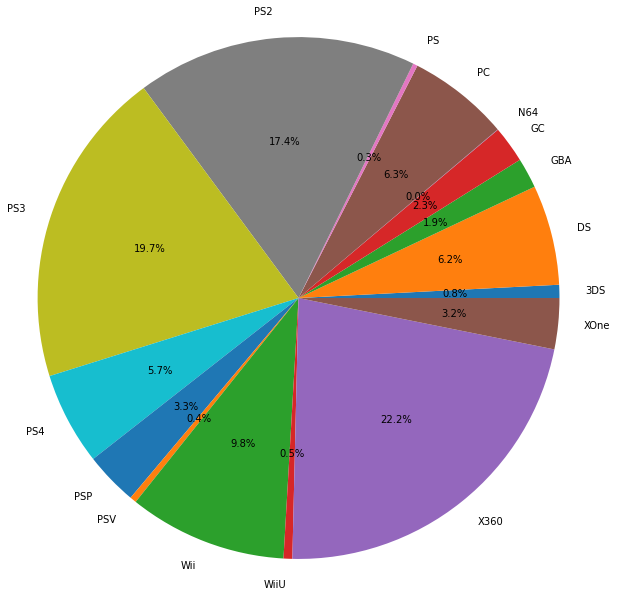

In [8]:
x = ft.groupby(['Platform']).sum()
plt.pie(x.Global_Sales, labels= x.index, autopct='%1.1f%%', radius=3)

The platform that generated the most revenue are:
1. X360
2. PS3
3. PS2

We can investigate this further.

C:\Users\Othamne\AppData\Local\Temp/ipykernel_14496/4195172608.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x = merge.groupby(['Year','Platform']).sum()


<Axes: xlabel='Year'>

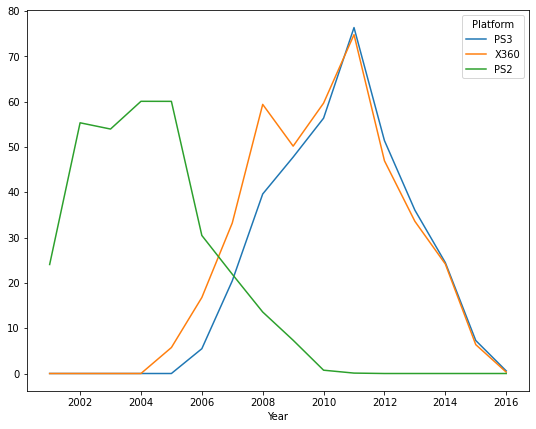

In [9]:
x = merge.groupby(['Year','Platform']).sum()
x.Global_Sales.unstack(level=1)[['PS3','X360','PS2']].plot(figsize=(9,7))

Looking at the distribution of Game total Sales by platform for each year, we see that the PS3 and X360 had similar success, more than the generation that came after and before, except that the X360 was released earlier

C:\Users\Othamne\AppData\Local\Temp/ipykernel_14496/208642980.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y = merge.groupby(['Year','Platform']).mean()


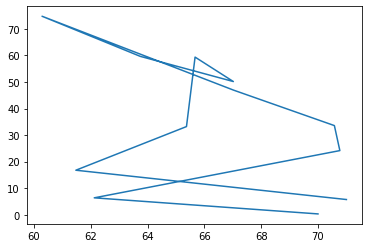

In [10]:
a = x.unstack(level=1).Global_Sales['X360']
y = merge.groupby(['Year','Platform']).mean()
b = y.unstack(level=1).Review_score['X360']
plt.plot(b,a)

The year that produced the best games are different from the years that produced the most sales, one possible explanation can be in the quantity of game produced.

(array([1., 2., 0., 1., 1., 1., 2., 0., 0., 4.]),
 array([60.28813559, 61.35932203, 62.43050847, 63.50169492, 64.57288136,
        65.6440678 , 66.71525424, 67.78644068, 68.85762712, 69.92881356,
        71.        ]),
 <BarContainer object of 10 artists>)

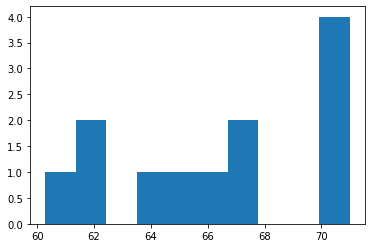

In [11]:
z = merge.groupby(['Year','Platform']).count()
c = b = y.unstack(level=1).Review_score['X360']
plt.hist(c)

The explanation given earlier is invalid since most games on the X360 score 70. We can conclude that some game are too overpriced (assume price is representative of the game quality)

After exploring our data let us do some more preprocessing to get it ready for outlier detection, namely:
- standardize the continuous variables
- one-hot encode our categorical data

In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer

In [13]:
# Standardize the contnuous features
scaler = StandardScaler()
X = scaler.fit_transform(merge[['Global_Sales','Review_score', 'SinglePlayer_All_PlayStyles_Polled']])
merge1 = merge[['Year', 'Global_Sales', 'Platform', 'Publisher', 'Review_score', 'SinglePlayer_All_PlayStyles_Polled']].copy()
merge1[['Global_Sales','Review_score', 'SinglePlayer_All_PlayStyles_Polled']] = X[:,:]

# Encode categorical  features using one-hot encoding (Year, Publisher, Platform)
ct = ColumnTransformer([('encoder', OneHotEncoder(), [1,2,3])], remainder='passthrough')
merge1 = ct.fit_transform(merge1)

## Outlier detection:

In [14]:
merge.head()

,Year,Global_Sales,Platform,Publisher,Review_score,SinglePlayer_All_PlayStyles_Polled
0,2001,0.03,PC,Strategy First,71,5.31
1,2011,10.26,Wii,Ubisoft,72,126.77
2,2011,0.63,PS3,Ubisoft,72,126.77
3,2011,2.03,X360,Ubisoft,72,126.77
4,2010,9.52,Wii,Ubisoft,63,11.00


We use the One-class SVM method in order to detect our outliers. it basically classifies our data as inliners (1) or outliers (-1) using the RBF kernel function. 

In [15]:
from sklearn.svm import OneClassSVM

In [16]:
# Create the One-Class SVM model
model = OneClassSVM(kernel='rbf', gamma = 'auto', nu=0.05)
model.fit(merge1)
y_pred = model.predict(merge1)
y_pred[y_pred == -1].shape

(119,)

The parameters of the SVM model are subject to tuning and optimization (e.g. Using GridSearchCV). With the current parameters the model has detected 119 entries as outliers. Let's try to understand why.

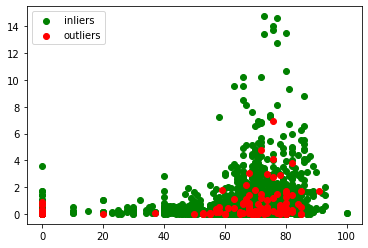

In [17]:
plt.scatter(merge.Review_score[y_pred == 1], merge[y_pred == 1].Global_Sales, c='green', label='inliers')
plt.scatter(merge.Review_score[y_pred == -1], merge[y_pred == -1].Global_Sales, c='red', label='outliers')
plt.legend()
plt.show()

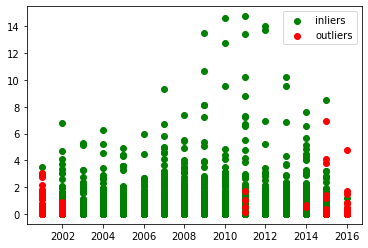

In [18]:
plt.scatter(merge.Year[y_pred == 1], merge[y_pred == 1].Global_Sales, c='green', label='inliers')
plt.scatter(merge.Year[y_pred == -1], merge[y_pred == -1].Global_Sales, c='red', label='outliers')
plt.legend()
plt.show()

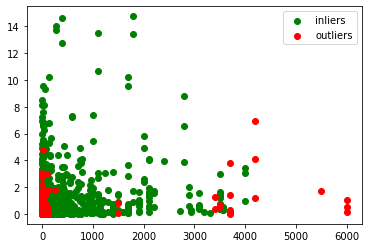

In [19]:
plt.scatter(merge.SinglePlayer_All_PlayStyles_Polled[y_pred == 1], merge[y_pred == 1].Global_Sales, c='green', label='inliers')
plt.scatter(merge.SinglePlayer_All_PlayStyles_Polled[y_pred == -1], merge[y_pred == -1].Global_Sales, c='red', label='outliers')
plt.legend()
plt.show()

From the plots above, we notice that our outliers are generally at the extrem values for features like **SinglePlayer_All_PlayStyles_Polled** and **year** as well as very low **Review_score** which makes sens.

If the outlier detection process is satisfactory, all that is left is to remove them from our data.

In [21]:
final = merge[y_pred==1].copy()
final.shape

(2261, 6)